# **Cardiovascular Risk Project**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.
Data Description
Demographic:
• Sex: male or female("M" or "F")
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.feature_selection import mutual_info_classif


from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error

from sklearn.metrics import accuracy_score, auc, precision_score,\
 recall_score, f1_score

from sklearn.metrics import classification_report,  plot_confusion_matrix


from sklearn.model_selection import train_test_split, StratifiedKFold,\
RandomizedSearchCV, GridSearchCV, cross_val_score

from imblearn.over_sampling import SMOTE


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv', index_col = 'id')
data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
data['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
 target_variable = 'TenYearCHD'

## **EDA**

### **Exploration - Categorical + Categorical-Type**

In [ ]:
# Make a copy always

df = data.copy()
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# No duplicated in the dataset
# Proceed merrily 

len(df[df.duplicated()])

0

In [ ]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

print("Percentage missing : {:.3%} ".format(total_missing/total_cells))

Percentage missing : 0.940% 


In [ ]:
# Handle the missing values
# Do not drop the null values this should not be prefered
# Dataset is not small

print(df.shape)
# df = df.dropna()
#print(df.shape)

null_columns = []
for x,y in dict(zip(df.isnull().sum().index, df.isnull().sum().values)).items():
  if y > 0:
    null_columns.append(x)

# Some data is numerical
# Some data is categorical 

for x in null_columns[:3]:
  # This cant be done as df['education'].mode()
  # as this is not the correct data type - array

  df[x] = df[x].fillna(df[x].value_counts().index[0], axis = 0)

for x in null_columns[3:]:
  df[x] = df[x].fillna(method='bfill', axis=0).fillna(0)


(3390, 16)


In [ ]:
null_columns

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

In [ ]:
# df[pd.isnull(df.education)] - To find those samples where df.education is null
# Null values after fillna()

df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
# Converting to int type
# Features are pseudo categorical

df['BPMeds'] = df['BPMeds'].astype(int)
df['education'] = df['education'].astype(int)
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2,F,YES,3.0,0,0,0,0,221.0,148.0,85.0,29.77,90.0,80.0,1
1,36,4,M,NO,0.0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1,F,YES,10.0,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,M,YES,20.0,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1,F,YES,30.0,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Sanity Check
# Checking whether the is_smoking and cigsPerDay is same logic
# is_smking = No and cigsPerDay should be 0


if df.loc[(df['is_smoking']== 'NO') &  (df['cigsPerDay']>0)].shape[0] == 0:
  print ("is_smoking MATCHES cigsPerDay = 0") 

is_smoking MATCHES cigsPerDay = 0


In [ ]:
# Changing the cigsPerDay condition
# Discretizing the continuous variable

conditions = [df['cigsPerDay']==0,
              df['cigsPerDay']<=10,
              df['cigsPerDay']<=20,
              df['cigsPerDay']<=30,
              df['cigsPerDay']<=40,
              df['cigsPerDay']<=50,
              df['cigsPerDay']<=60,
              df['cigsPerDay']<=70,
              df['cigsPerDay']<=80
              ]


values = [0,1,2,3,4,5,6,7,8]
df['cigsPerDay_cat']= np.select(conditions, values)

In [ ]:
df_cigs = df.pop('cigsPerDay_cat')

p = 0

for x in df.columns:
  if x == 'cigsPerDay':
    break
  else:
    p += 1

p

if 'cigsPerDay_cat' not in df.columns:
  df.insert(p+1, 'cigsPerDay_cat', df_cigs)
  print ("Insertion Doneee !!!!")
else:
  print ("Insertion redundant")

df.head()

df = df.drop('cigsPerDay', axis = 1)
df.head()

Insertion Doneee !!!!


,age,education,sex,is_smoking,cigsPerDay_cat,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2,F,YES,1,0,0,0,0,221.0,148.0,85.0,29.77,90.0,80.0,1
1,36,4,M,NO,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1,F,YES,1,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,M,YES,2,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1,F,YES,3,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
print(df['cigsPerDay_cat'].value_counts().sort_index(), "\n")
df = df.replace({'cigsPerDay_cat' : {6:4, 7:4, 8:4 , 5:4 }})
df['cigsPerDay_cat'].value_counts().sort_index()

0    1725
1     496
2     805
3     225
4      80
5      50
6       8
7       1
Name: cigsPerDay_cat, dtype: int64 



0    1725
1     496
2     805
3     225
4     139
Name: cigsPerDay_cat, dtype: int64

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay_cat,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2,F,YES,1,0,0,0,0,221.0,148.0,85.0,29.77,90.0,80.0,1
1,36,4,M,NO,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1,F,YES,1,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,M,YES,2,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1,F,YES,3,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
categorical_variables_type = []
categorical_variables_type.extend(['education', 'sex', 'cigsPerDay_cat',
                            'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes' ,'is_smoking'])

print(categorical_variables_type)



['education', 'sex', 'cigsPerDay_cat', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'is_smoking']


In [ ]:
numerical_variables = [x for x in df.describe().columns 
                       if x not in categorical_variables_type and x not in target_variable]

print(categorical_variables_type, "\n")
print(numerical_variables, "\n")
target_variable



['education', 'sex', 'cigsPerDay_cat', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'is_smoking'] 

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'] 



'TenYearCHD'

In [ ]:
drop_feature_candidates = []

In [ ]:
# Since this is binary classification you can do this
# It gives percentage of hear disease =1 by a certain feature values

def get_labels_values(feature):

# feature : feature column from dataset


  feature_values = []

  for x in sorted(list(feature.unique())):
    feature_values.append((df.loc[feature==x][df['TenYearCHD']==1].shape[0],df.loc[feature==x][df['TenYearCHD']==0].shape[0]))

  for x,y in enumerate(feature_values):
    feature_values[x] = y[0]/(y[0]+y[1]) * 100

  labels = sorted(list(feature.unique()))

  return labels, feature_values

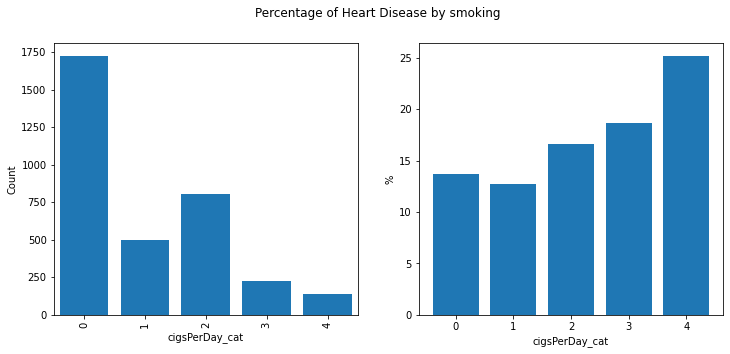

In [ ]:
# For cigarettes per day category
# We can see it rises as num cigarettes increase

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
df['cigsPerDay_cat'].value_counts().sort_index().plot.bar()
plt.bar(list(df['cigsPerDay_cat'].value_counts().sort_index().index),
        list(df['cigsPerDay_cat'].value_counts().sort_index().values))
plt.ylabel('Count')
plt.xlabel('cigsPerDay_cat')



plt.subplot(1,2,2)
x,y = get_labels_values(df['cigsPerDay_cat'])
plt.bar(x,y)
plt.ylabel('%')
plt.xlabel('cigsPerDay_cat')
plt.suptitle('Percentage of Heart Disease by smoking')
plt.show()

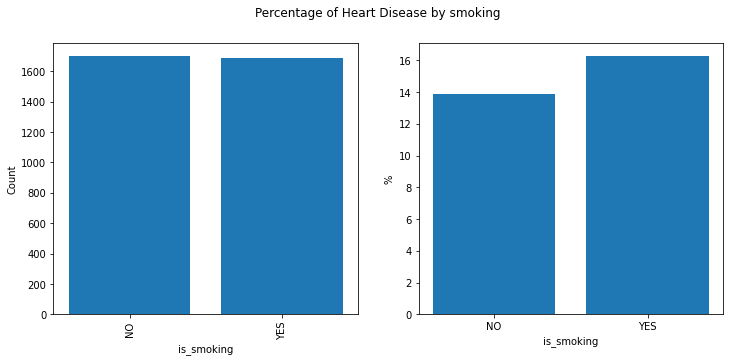

In [ ]:
# Smoking by itself poses a higher risk
# Not by much though
# 2 percentage points
# 14% higher chance
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
df['is_smoking'].value_counts().sort_index().plot.bar()
plt.bar(list(df['is_smoking'].value_counts().sort_index().index),
        list(df['is_smoking'].value_counts().sort_index().values))
plt.ylabel('Count')
plt.xlabel('is_smoking')



plt.subplot(1,2,2)
x,y = get_labels_values(df['is_smoking'])
plt.bar(x,y)
plt.ylabel('%')
plt.xlabel('is_smoking')
plt.suptitle('Percentage of Heart Disease by smoking')
plt.show()

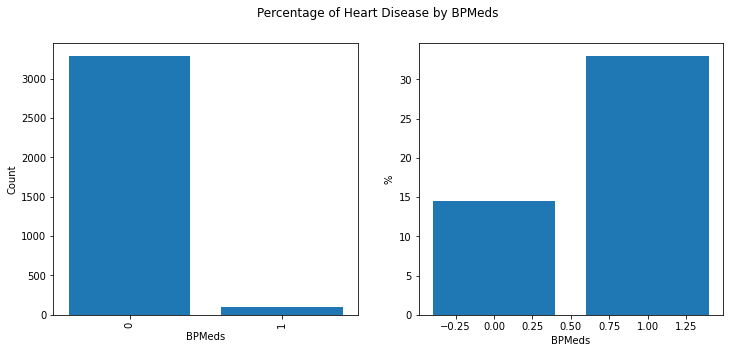

In [ ]:
# distribution of BPMeds- 0,1
# burden of disease by BPMeds 
# Dominated by one value (BPMeds - 0)
# Double the chance of TenYearCHD if BPMeds == Yes
# Here the target_variable is imbalanced so removing features with sparse 

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
df['BPMeds'].value_counts().sort_index().plot.bar()
plt.bar(list(df['BPMeds'].value_counts().sort_index().index),
        list(df['BPMeds'].value_counts().sort_index().values))
plt.ylabel('Count')
plt.xlabel('BPMeds')



plt.subplot(1,2,2)
x,y = get_labels_values(df['BPMeds'])
plt.bar(x,y)
plt.ylabel('%')
plt.xlabel('BPMeds')
plt.suptitle('Percentage of Heart Disease by BPMeds')
plt.show()

In [ ]:
# Samples dominated by one value
# May not make sense to drop due to imbalanced nature of the target variable

drop_feature_candidates.append('BPMeds')

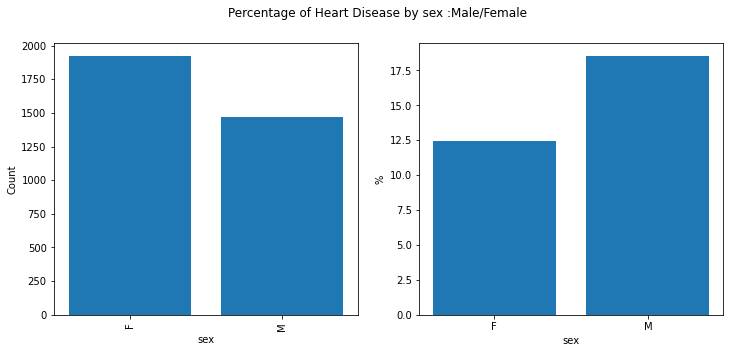

In [ ]:
# Finding the distribution of gender
# Finding health diseases burden by gender
# Male have significantly higher chance of 

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
df['sex'].value_counts().sort_index().plot.bar()
plt.bar(list(df['sex'].value_counts().sort_index().index),
        list(df['sex'].value_counts().sort_index().values))
plt.ylabel('Count')
plt.xlabel('sex')



plt.subplot(1,2,2)
x,y = get_labels_values(df['sex'])
plt.bar(x,y)
plt.ylabel('%')
plt.xlabel('sex')
plt.suptitle('Percentage of Heart Disease by sex :Male/Female')
plt.show()

In [ ]:
# Difference in BMI between men and women

df.loc[:, ['sex', 'education','BMI', 'totChol']].groupby('sex')['BMI'].median()

sex
F    24.69
M    26.11
Name: BMI, dtype: float64

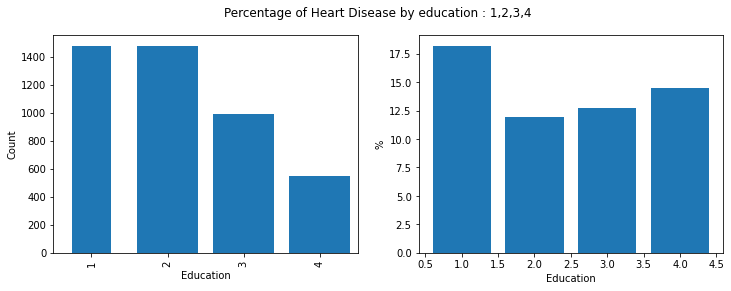

In [ ]:
# Finding the distribution of education
# Finding health diseases burden by education
# reasonable number of samples with each education value
# Education follows the expected pattern
# There is an odd relationship between education and TenYearCHD

plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
df['education'].value_counts().sort_index().plot.bar()
plt.bar(list(df['education'].value_counts().sort_index().index),
        list(df['education'].value_counts().sort_index().values))
plt.ylabel('Count')
plt.xlabel('Education')


plt.subplot(1,2,2)
x,y = get_labels_values(df['education'])
plt.bar(x,y)
plt.ylabel('%')
plt.xlabel('Education')
plt.suptitle('Percentage of Heart Disease by education : 1,2,3,4')
plt.show()

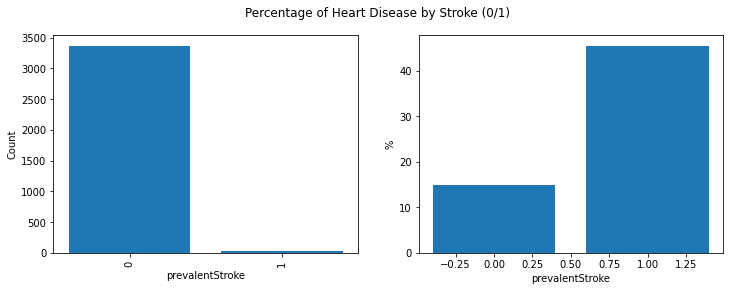

In [ ]:
# Finding the distribution of prevalentStroke
# Finding health diseases burden by prevalentStroke
# Feature dominated by one value - 0
# Using this feature could risk overfitting the data 


plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
df['prevalentStroke'].value_counts().sort_index().plot.bar()
plt.bar(list(df['prevalentStroke'].value_counts().sort_index().index),
        list(df['prevalentStroke'].value_counts().sort_index().values))
plt.ylabel('Count')
plt.xlabel('prevalentStroke')



plt.subplot(1,2,2)
x,y = get_labels_values(df['prevalentStroke'])
plt.bar(x,y)
plt.ylabel('%')
plt.xlabel('prevalentStroke')
plt.suptitle('Percentage of Heart Disease by Stroke (0/1)')
plt.show()


In [ ]:
drop_feature_candidates.append('prevalentStroke')

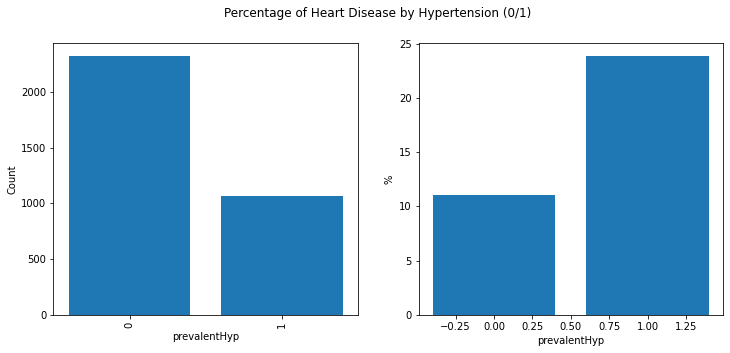

In [ ]:
# distribution of prevalentHyp
# health diseases burden by prevalentHyp
# Feature split 1/3 - Can be used
# This feature has predictive power

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
df['prevalentHyp'].value_counts().sort_index().plot.bar()
plt.bar(list(df['prevalentHyp'].value_counts().sort_index().index),
        list(df['prevalentHyp'].value_counts().sort_index().values))
plt.ylabel('Count')
plt.xlabel('prevalentHyp')



plt.subplot(1,2,2)
x,y = get_labels_values(df['prevalentHyp'])
plt.bar(x,y)
plt.ylabel('%')
plt.xlabel('prevalentHyp')
plt.suptitle('Percentage of Heart Disease by Hypertension (0/1)')
plt.show()

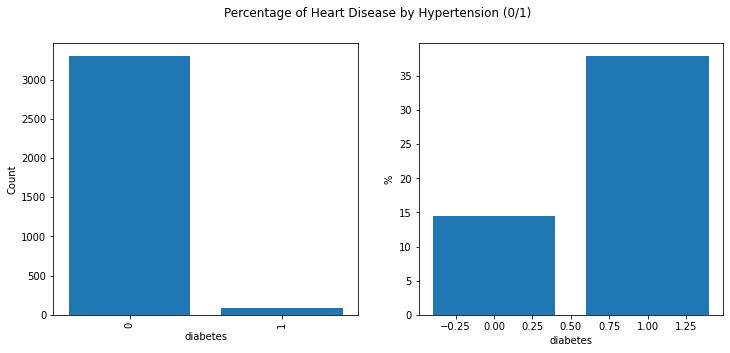

In [ ]:
# distribution of diabetes
# health diseases burden by diabetes
# Feature dominated by majority class: diabetes -0
# Low variance / Single value feature / Majority dominated feature
# Predictive power perhaps low

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
df['diabetes'].value_counts().sort_index().plot.bar()
plt.bar(list(df['diabetes'].value_counts().sort_index().index),
        list(df['diabetes'].value_counts().sort_index().values))
plt.ylabel('Count')
plt.xlabel('diabetes')



plt.subplot(1,2,2)
x,y = get_labels_values(df['diabetes'])
plt.bar(x,y)
plt.ylabel('%')
plt.xlabel('diabetes')
plt.suptitle('Percentage of Heart Disease by Hypertension (0/1)')
plt.show()

In [ ]:
drop_feature_candidates.append('diabetes')

In [ ]:
# Old way of doing the work
# Not needed now as the function get_labels_values is available
'''
cigs = []
for x in sorted(list(df['cigsPerDay_cat'].unique())):
  cigs.append((df.loc[df['cigsPerDay_cat']==x][df['TenYearCHD']==1].shape[0],df.loc[df['cigsPerDay_cat']==x][df['TenYearCHD']==0].shape[0]))
  
for x,y in enumerate(cigs):
  cigs[x] = y[0]/(y[0]+y[1])

print(cigs)


labels = sorted(list(df['cigsPerDay_cat'].unique()))
plt.bar(labels, cigs)
plt.title('Percentage of Heart Disease by smoking')
plt.show()
del(labels)
del(cigs)

'''

"\ncigs = []\nfor x in sorted(list(df['cigsPerDay_cat'].unique())):\n  cigs.append((df.loc[df['cigsPerDay_cat']==x][df['TenYearCHD']==1].shape[0],df.loc[df['cigsPerDay_cat']==x][df['TenYearCHD']==0].shape[0]))\n  \nfor x,y in enumerate(cigs):\n  cigs[x] = y[0]/(y[0]+y[1])\n\nprint(cigs)\n\n\nlabels = sorted(list(df['cigsPerDay_cat'].unique()))\nplt.bar(labels, cigs)\nplt.title('Percentage of Heart Disease by smoking')\nplt.show()\ndel(labels)\ndel(cigs)\n\n"

### **Exploration - Numerical**

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay_cat,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2,F,YES,1,0,0,0,0,221.0,148.0,85.0,29.77,90.0,80.0,1
1,36,4,M,NO,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1,F,YES,1,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,M,YES,2,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1,F,YES,3,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


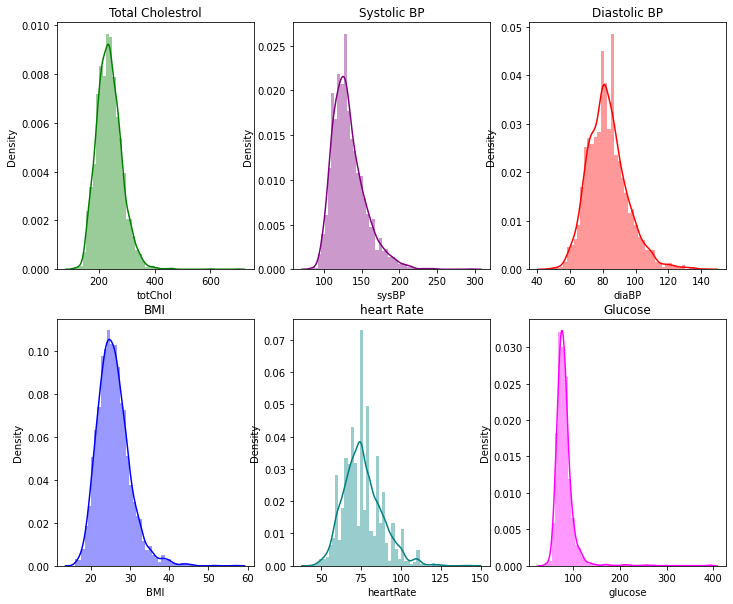

In [ ]:
# Median BMI seems to be in the healthy range
# Upperquartile also seems to be in healthy range
# Distribution largely in healthy BMI 

plt.figure(figsize = (12,10))
plt.subplot(2,3,1)
sns.distplot(a = df['totChol'], color = 'green', kde = True)
plt.title('Total Cholestrol')

plt.subplot(2,3,2)
sns.distplot(a = df['sysBP'], color = 'purple', kde = True)
plt.title('Systolic BP')


plt.subplot(2,3,3)
sns.distplot(a = df['diaBP'], color = 'red', kde = True)
plt.title('Diastolic BP')

plt.subplot(2,3,4)
sns.distplot(a = df['BMI'], color = 'blue', kde = True)
plt.title('BMI')

plt.subplot(2,3,5)
sns.distplot(a = df['heartRate'], color = 'teal', kde = True)
plt.title('heart Rate')

plt.subplot(2,3,6)
sns.distplot(a = df['glucose'], color = 'magenta', kde = True)
plt.title('Glucose')

plt.show()



# df['BMI'].describe()

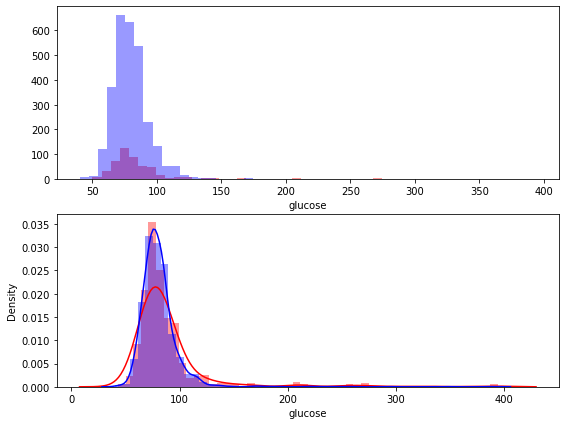

In [ ]:
# Not much differene in these distributions
# glucose does not have much predictive power

plt.figure(figsize = (9,7))


plt.subplot(2, 1, 1)
sns.distplot(a = df.loc[df['TenYearCHD']==1]['glucose'], color = 'red', kde = False)
sns.distplot(a = df.loc[df['TenYearCHD']==0]['glucose'], color = 'blue', kde = False)

plt.subplot(2, 1, 2)
sns.distplot(a = df.loc[df['TenYearCHD']==1]['glucose'], color = 'red', kde = True)
sns.distplot(a = df.loc[df['TenYearCHD']==0]['glucose'], color = 'blue', kde = True)

plt.show()

drop_feature_candidates.append('glucose')

TenYearCHD
0    2.0
1    1.0
Name: education, dtype: float64


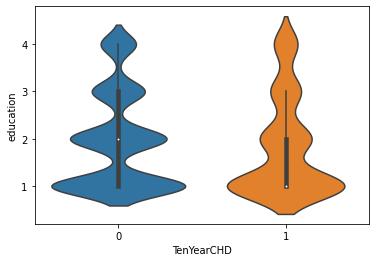

In [ ]:
sns.violinplot(x="TenYearCHD", y="education", data=df)
print(df.groupby('TenYearCHD')['education'].median())

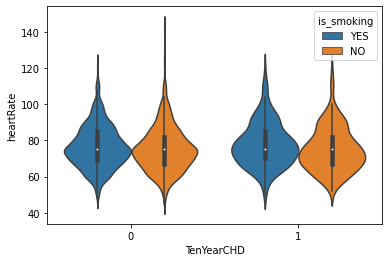

In [ ]:
# Quite interesting 
# cigsPerDay doesnt show much difference but shows much difference across
# TenYearCHD but for those with TenYearCHD =1
# cigsPerDay shows variation in heartRate

sns.violinplot(x="TenYearCHD", y="heartRate", hue = 'is_smoking',
               data=df)

In [ ]:
df.head(3)

,age,education,sex,is_smoking,cigsPerDay_cat,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2,F,YES,1,0,0,0,0,221.0,148.0,85.0,29.77,90.0,80.0,1
1,36,4,M,NO,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1,F,YES,1,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


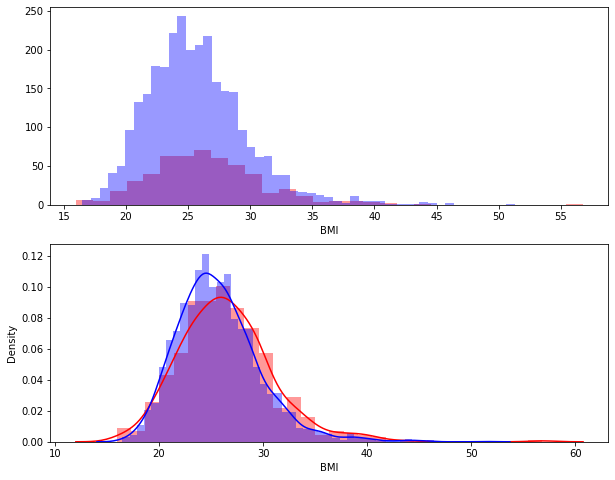

In [ ]:
# Comparing BMI and TenYearCHD
# BMI does not have significant predictive power on visual analysis



plt.figure(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.distplot(a = df.loc[df['TenYearCHD']==1]['BMI'], color = 'red', kde = False)
sns.distplot(a = df.loc[df['TenYearCHD']==0]['BMI'], color = 'blue', kde = False)

plt.subplot(2, 1, 2)
sns.distplot(a = df.loc[df['TenYearCHD']==1]['BMI'], color = 'red', kde = True)
sns.distplot(a = df.loc[df['TenYearCHD']==0]['BMI'], color = 'blue', kde = True)

plt.show()

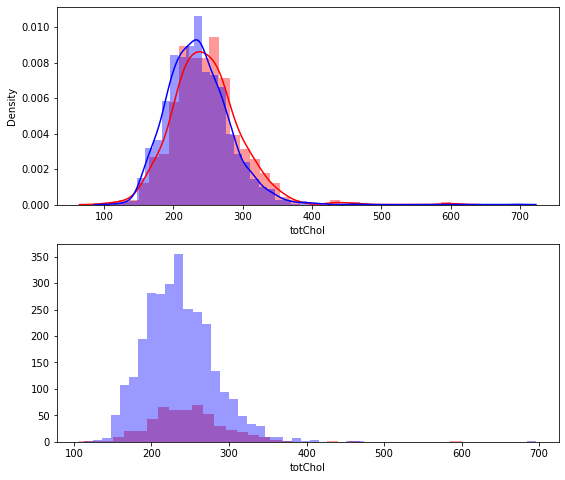

In [ ]:
# Comparing totChol and TenYearCHD
# The distribution is similar

plt.figure(figsize = (9,8))
plt.subplot(2, 1, 1)
sns.distplot(a = df.loc[df['TenYearCHD']==1]['totChol'], color = 'red')
sns.distplot(a = df.loc[df['TenYearCHD']==0]['totChol'], color = 'blue')

plt.subplot(2, 1, 2)
sns.distplot(a
             = df.loc[df['TenYearCHD']==1]['totChol'], color = 'red', kde = False)
sns.distplot(a = df.loc[df['TenYearCHD']==0]['totChol'], color = 'blue', kde = False)

plt.show()

drop_feature_candidates.append('totChol')

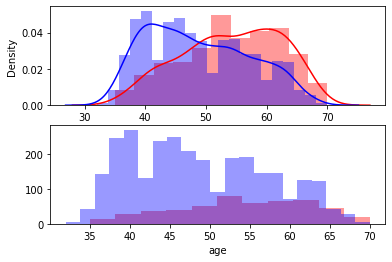

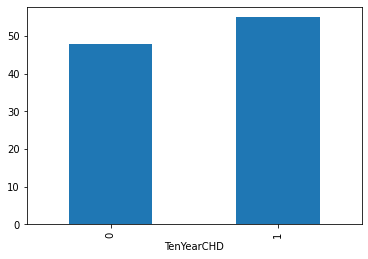

In [ ]:
# Those with TenYearCHD have higher age
# age is an important factor to predict TenYearCHD
# Distributions have different shapes

plt.subplot(2,1,1)
sns.distplot(a = df.loc[df['TenYearCHD']==1]['age'], color = 'red')
sns.distplot(a = df.loc[df['TenYearCHD']==0]['age'], color = 'blue')

plt.subplot(2,1,2)
sns.distplot(a = df.loc[df['TenYearCHD']==1]['age'], color = 'red', kde = False)
sns.distplot(a = df.loc[df['TenYearCHD']==0]['age'], color = 'blue', kde = False)
plt.show()

df.groupby('TenYearCHD')['age'].median().plot.bar()

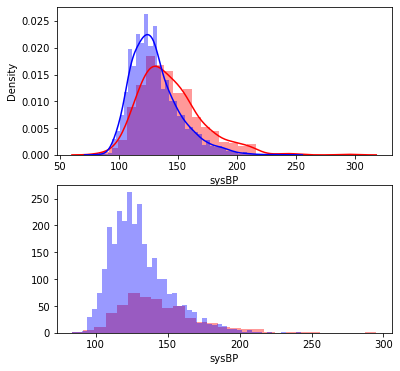

TenYearCHD
0    127.0
1    139.0
Name: sysBP, dtype: float64

In [ ]:
# sysBP is skewed towards the right
# It has noticeable difference between CHD =1 and CHD = 0

plt.figure(figsize =(6,6))

plt.subplot(2,1,1)
sns.distplot(a = df.loc[df['TenYearCHD']==1]['sysBP'], color = 'red')
sns.distplot(a = df.loc[df['TenYearCHD']==0]['sysBP'], color = 'blue')

plt.subplot(2,1,2)
sns.distplot(a = df.loc[df['TenYearCHD']==1]['sysBP'], color = 'red', kde = False)
sns.distplot(a = df.loc[df['TenYearCHD']==0]['sysBP'], color = 'blue', kde = False)
plt.show()

df.groupby('TenYearCHD')['sysBP'].median()
#print(df.loc[df['TenYearCHD']==1, ['sysBP']]['sysBP'].describe(), "\n")
#print(df.loc[df['TenYearCHD']==0, ['sysBP']]['sysBP'].describe(), "\n")


count    511.000000
mean      86.763209
std       14.043026
min       48.000000
25%       78.000000
50%       85.000000
75%       95.000000
max      135.000000
Name: diaBP, dtype: float64 

count    2879.000000
mean       82.194338
std        11.495256
min        50.000000
25%        74.000000
50%        81.000000
75%        88.000000
max       142.500000
Name: diaBP, dtype: float64 



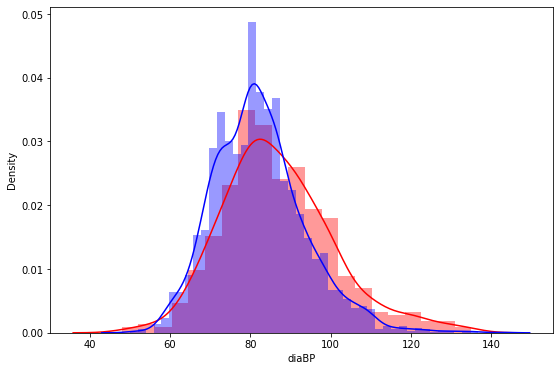

In [ ]:
# Similar distributions for diaBP
# No significant impact of diaBP on TenYearCHD
# Unlike sysBP

plt.figure(figsize = (9,6))
sns.distplot(a = df.loc[df['TenYearCHD']==1]['diaBP'], color = 'red')
sns.distplot(a = df.loc[df['TenYearCHD']==0]['diaBP'], color = 'blue')

print(df.loc[df['TenYearCHD']==1, ['diaBP']]['diaBP'].describe(), "\n")
print(df.loc[df['TenYearCHD']==0, ['diaBP']]['diaBP'].describe(), "\n")

plt.show()

drop_feature_candidates.append('diaBP')


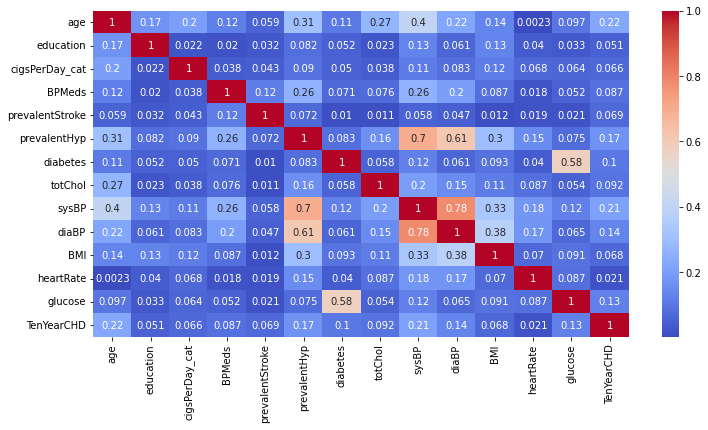

In [ ]:
# Shows very little collinearity
# May not be benificial to try linear models at all


plt.figure(figsize = (12,6))
correlation = df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = 'coolwarm')

plt.show()

## **Outliers - Numerical**

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay_cat,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2,F,YES,1,0,0,0,0,221.0,148.0,85.0,29.77,90.0,80.0,1
1,36,4,M,NO,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1,F,YES,1,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,M,YES,2,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1,F,YES,3,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
numerical_variables

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

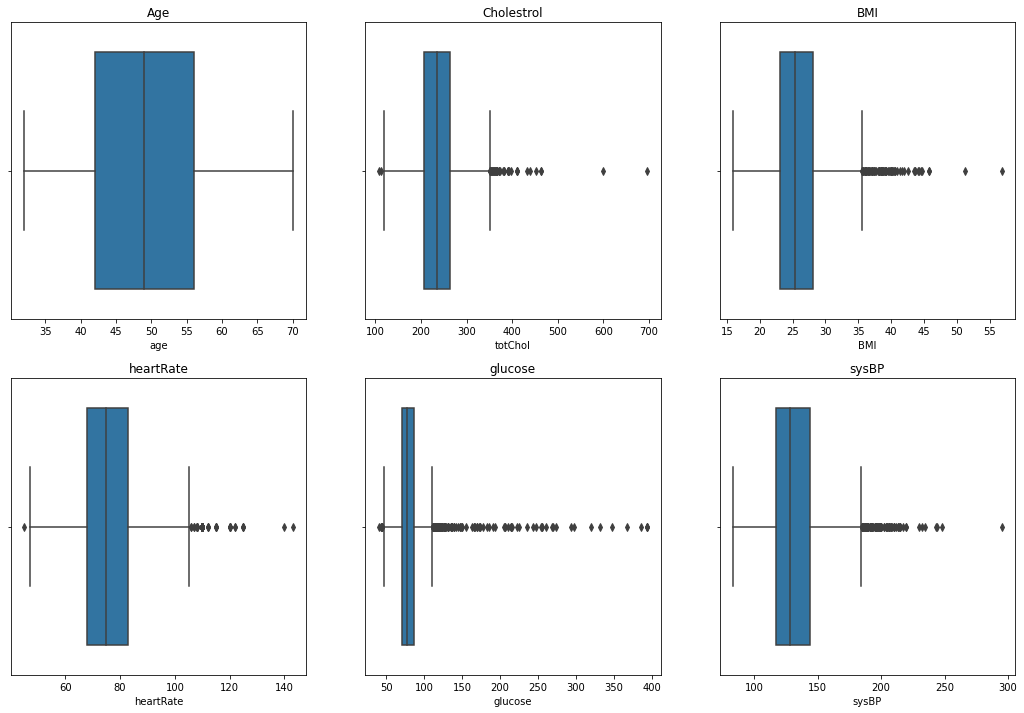

In [ ]:
# So many outliers 
# Makes sense to impute them to 90% cap??
# Or should we let it be 
# Considering that it is an imbalanced class problem
# Will be found emperically

plt.figure(figsize =(18,12))
plt.subplot(2,3,1)
plt.title('Age')
sns.boxplot(x = df['age'])

plt.subplot(2,3,2)
plt.title('Cholestrol')
sns.boxplot(x = df['totChol'])


plt.subplot(2,3,3)
plt.title('BMI')
sns.boxplot(x = df['BMI'])

plt.subplot(2,3,4)
plt.title('heartRate')
sns.boxplot(x = df['heartRate'])

plt.subplot(2,3,5)
plt.title('glucose')
sns.boxplot(x = df['glucose'])

plt.subplot(2,3,6)
plt.title('sysBP')
sns.boxplot(x = df['sysBP'])

In [ ]:
numerical_variables

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [ ]:
# To find all those samples that have an outlier
# Get the indices -> outliers_index
# See how outliers impact the class distributions                        


outliers_index = set()
for x in numerical_variables:

  Q1 = df[x].quantile(0.25)
  Q3 = df[x].quantile(0.75)
  IQR = Q3 - Q1
  outliers_index.update(df.loc[(df[x]> Q3 + 1.5 * IQR) | (df[x]< Q1 - 1.5 * IQR)].index)
  print(len(df.loc[(df[x]> Q3 + 1.5 * IQR) | (df[x]< Q1 - 1.5 * IQR)].index))

# outliers_index

print("Total number of outliers in index : {}" .format(len(outliers_index)))

x = df.loc[outliers_index]['TenYearCHD'].value_counts().tolist()
print("\nThe ratio of 1 to 0 w/outliers : {}".format(round(x[1]/x[0] ,3)))

x = df['TenYearCHD'].value_counts().tolist()
print("\nThe ratio of 1 to 0 w/o outliers : {}".format(round(x[1]/x[0] , 3)))

del(Q1)
del(Q3)
del(IQR)

0
44
105
58
77
64
172
Total number of outliers in index : 419

The ratio of 1 to 0 w/outliers : 0.378

The ratio of 1 to 0 w/o outliers : 0.177




*   It may be prudent not to median impute the outliers completely
*   One strategy could be to cap it to a certain value






In [ ]:
Q1 = df['totChol'].quantile(0.25)
Q3 = df['totChol'].quantile(0.75)
IQR = Q3 - Q1
len(df.loc[(df['totChol']> Q3 + 1.5 * IQR) | (df['totChol']< Q1 - 1.5 * IQR)].index)

44

In [ ]:
del(Q1)
del(Q3)
del(IQR)

In [ ]:
from collections import Counter

Counter(df['TenYearCHD'])

Counter({0: 2879, 1: 511})

## **Feature Importance - Mutual Info**

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay_cat,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2,F,YES,1,0,0,0,0,221.0,148.0,85.0,29.77,90.0,80.0,1
1,36,4,M,NO,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1,F,YES,1,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,M,YES,2,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1,F,YES,3,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
X = df.copy()
y = X.pop("TenYearCHD")

In [ ]:
# Factorizing the columns

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [ ]:
def plot_mi_scores(scores):

    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")



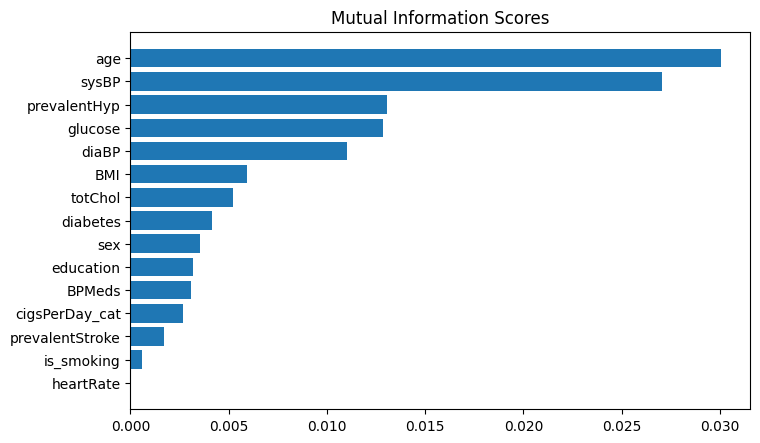

In [ ]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)


In [ ]:
df.head(3)

,age,education,sex,is_smoking,cigsPerDay_cat,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2,F,YES,1,0,0,0,0,221.0,148.0,85.0,29.77,90.0,80.0,1
1,36,4,M,NO,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1,F,YES,1,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


## **Modelling - Tree Based**

In [ ]:
target_variable

'TenYearCHD'

In [ ]:
# No scaling or extensive data preparation required
X = df.copy()
y = df[target_variable].copy()
X = X.drop(target_variable, axis = 1)
X.head(3)

,age,education,sex,is_smoking,cigsPerDay_cat,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
id,,,,,,,,,,,,,,,
0,64,2,F,YES,1,0,0,0,0,221.0,148.0,85.0,29.77,90.0,80.0
1,36,4,M,NO,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,1,F,YES,1,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0


In [ ]:
# Columns to consider dropping - BPMeds, prevalentStroke, diabetes
# The dataset is small
# Not many samples or features
# Removing them might hurt model performance as no overfitting problem is solved

drop_feature_candidates

['BPMeds', 'prevalentStroke', 'diabetes', 'glucose', 'totChol', 'diaBP']

In [ ]:
# sex, is_smoking have to be encoded
# Other categorical_variables_type are numerical

df.loc[:5, categorical_variables_type]

,education,sex,cigsPerDay_cat,BPMeds,prevalentStroke,prevalentHyp,diabetes,is_smoking
id,,,,,,,,
0,2,F,1,0,0,0,0,YES
1,4,M,0,0,0,1,0,NO
2,1,F,1,0,0,0,0,YES
3,1,M,2,0,0,1,0,YES
4,1,F,3,0,0,0,0,YES
5,3,F,0,0,0,1,0,NO


In [ ]:
X = pd.get_dummies(X, columns=["sex", "is_smoking"], prefix=["sex","is_smoking"])
X.shape

(3390, 17)

In [ ]:
X.head(3)

,age,education,cigsPerDay_cat,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_F,sex_M,is_smoking_NO,is_smoking_YES
id,,,,,,,,,,,,,,,,,
0,64,2,1,0,0,0,0,221.0,148.0,85.0,29.77,90.0,80.0,1,0,0,1
1,36,4,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1,1,0
2,46,1,1,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,1,0,0,1


In [ ]:
# stratified kfold

'''
lst_accu_stratified = []
  
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
   
for train_index, test_index in skf.split(X, y):
  
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    heart_disease_classifier = DecisionTreeClassifier(criterion='entropy', max_depth = None, max_leaf_nodes=None, random_state= 324)
    heart_disease_classifier.fit(X_train_fold, y_train_fold)

    y_test_pred = heart_disease_classifier.predict(X_test_fold)

    lst_accu_stratified.append(f1_score(y_test_pred, y_test_fold , average = None))

lst_accu_stratified
'''   

"\nlst_accu_stratified = []\n  \nskf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)\n   \nfor train_index, test_index in skf.split(X, y):\n  \n    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]\n    y_train_fold, y_test_fold = y[train_index], y[test_index]\n\n    heart_disease_classifier = DecisionTreeClassifier(criterion='entropy', max_depth = None, max_leaf_nodes=None, random_state= 324)\n    heart_disease_classifier.fit(X_train_fold, y_train_fold)\n\n    y_test_pred = heart_disease_classifier.predict(X_test_fold)\n\n    lst_accu_stratified.append(f1_score(y_test_pred, y_test_fold , average = None))\n\nlst_accu_stratified\n"

In [ ]:
# Evaluating with DecisionTree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

heart_disease_classifier = DecisionTreeClassifier(criterion='entropy', max_depth = 8, max_leaf_nodes=7, random_state=324)

heart_disease_classifier.fit(X_train, y_train)

y_predicted = heart_disease_classifier.predict(X_test)



In [ ]:
# Accuracy is on the higher side

round(accuracy_score(y_test, y_predicted) * 100, 3)

85.523

In [ ]:
# f1 score is very low
# Imbalanced dataset

round(f1_score(y_test, y_predicted) * 100, 3 )

3.571

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       959
           1       0.38      0.02      0.04       160

    accuracy                           0.86      1119
   macro avg       0.62      0.51      0.48      1119
weighted avg       0.79      0.86      0.80      1119



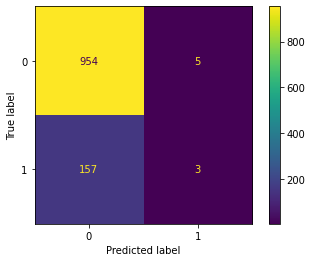

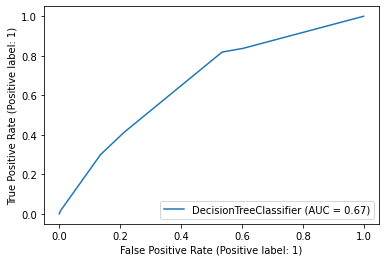

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

plot_confusion_matrix(heart_disease_classifier, X_test,y_test)
plot_roc_curve(heart_disease_classifier, X_test,y_test)


=== Confusion Matrix ===


<Figure size 432x288 with 0 Axes>

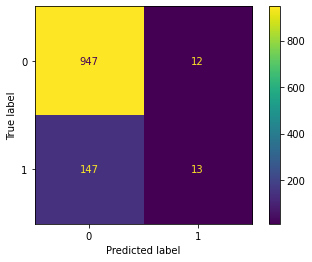

In [ ]:
# Using Random Forest 
# To check for different results

from sklearn.metrics import plot_confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators = 100, 
                                        max_leaf_nodes = None, max_features = None,
                                        max_depth = None, criterion = 'entropy')

rf_classifier.fit(X_train,y_train)
rf_predict = rf_classifier.predict(X_test)
# rfc_cv_score = cross_val_score(rf_classifier, X, y, cv=10, scoring='f1_micro')

print("=== Confusion Matrix ===")

plt.figure()
plot_confusion_matrix(rf_classifier, X_test, y_test)
plt.show()


In [ ]:
# Random Forest is equally bad
# f1 score is actually worse

print(accuracy_score(y_test, y_predicted) * 100)
print(f1_score(y_test, y_predicted) * 100)

85.52278820375335
3.571428571428571


In [ ]:
[x for x in np.arange(5, 16, 2)]

[5, 7, 9, 11, 13, 15]

In [ ]:
# Searching for hyperparameters with Random Search Cross Val
# Creating a RandomForestClassifier model
# Still an imbalanced dataset

# number of features at every split
max_features = ['auto', 'log2', None]
criterion = ['gini', 'entropy', 'log_loss']

# max depth
max_depth = [int(x) for x in np.linspace(5, 15, 8)]
max_depth.append(None)

# min_impurity_decrease
min_impurity_decrease = [x for x in np.arange(0.025, 0.2, 0.025)]

# max_leaf_nodes
max_leaf_nodes = [x for x in np.arange(5, 16, 2)]

# n_estimators
n_estimators = [x for x in np.arange(100, 1000, 50)] 

# create random grid
random_grid = {
  'n_estimators': n_estimators,
  'criterion': criterion,
  'max_features': max_features,
  'max_depth': max_depth,
  'min_impurity_decrease': min_impurity_decrease,
  'max_leaf_nodes' : max_leaf_nodes

 }
 
 # Random search of parameters
rcv_classifier = RandomForestClassifier()
rcv = RandomizedSearchCV(estimator = rcv_classifier,
                          param_distributions = random_grid,
                          n_iter = 200, cv = 5, verbose=2,
                          scoring = 'f1',
                          random_state=42, n_jobs = -1)

# Fit the model
rcv.fit(X_train, y_train)

# print results
print(rcv.best_params_)
print(rcv.best_score_)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [ ]:
RandomForestClassifier(n_estimators = 200,
                          min_impurity_decrease =  0.025,
                          max_leaf_nodes = 15, max_features = 'auto',
                          max_depth = None,
                          criterion = 'entropy')


rf_classifier.fit(X_train,y_train)
rf_predict = rf_classifier.predict(X_test)

plot_confusion_matrix(rf_classifier, X_test, y_test)


In [ ]:
# f1_score poor due to imbalanced nature of dataset
# Ratio is 5.5 : 1
# Hence perhaps beyond the scope of DT Classifier

f1_score(y_test, rf_predict)

### **Model w/balanced data**

In [ ]:
X = df.copy()
y = df[target_variable].copy()
X = X.drop(target_variable, axis = 1)

X = pd.get_dummies(X, columns=["sex", "is_smoking"], prefix=["sex","is_smoking"])
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X, y)


In [ ]:
from collections import Counter
print(X_smote.shape)
Counter(y_smote)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=324)

rf_classifier = RandomForestClassifier(n_estimators = 100, 
                                        max_leaf_nodes = None, max_features = None,
                                        max_depth = None, criterion = 'entropy')

rf_classifier.fit(X_train,y_train)
rf_predict = rf_classifier.predict(X_test)

rfc_cv_score = cross_val_score(rf_classifier, X_smote, y_smote, cv=10, scoring='f1')

print("=== Confusion Matrix ===")

plt.figure()
plot_confusion_matrix(rf_classifier, X_test, y_test)
plt.show()


In [ ]:
rfc_cv_score

In [ ]:
rf_classifier.fit(X_train,y_train)
rf_predict = rf_classifier.predict(X_test)

plot_confusion_matrix(rf_classifier, X_test, y_test)

In [ ]:
round(f1_score(y_test, rf_predict) * 100, 2)